<a href="https://colab.research.google.com/github/shivani983/computer-vision-handson/blob/main/smoke_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!nvidia-smi

Mon Apr 21 02:00:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# cloning yolo v5
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.31 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (11931/11931), done.


In [37]:
import os
os.chdir("/content/yolov5")

In [38]:
%ls

benchmarks.py    detect.py                  __pycache__/      segment/
CITATION.cff     export.py                  pyproject.toml    train.py
classify/        hubconf.py                 README.md         tutorial.ipynb
CONTRIBUTING.md  labels_WildFire_Smoke.csv  README.zh-CN.md   utils/
data/            LICENSE                    requirements.txt  val.py
data.yaml        models/                    runs/             yolov5s.pt


In [11]:
# installing requirements
!pip install -r requirements.txt
import torch

from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 69.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [39]:
%pwd

'/content/yolov5'

In [40]:
%cd ..

/content


In [ ]:
os.chdir("/content/")

In [41]:
!unzip /content/drive/MyDrive/computervision/smoke_detection.zip

Archive:  /content/drive/MyDrive/computervision/smoke_detection.zip
  inflating: WildFire_Smoke_Dataset_YOLO/data.yaml  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kcoc8ik6ni0848clxs0vif_jpeg.rf.8b4629777ffe1d349cc970ee8af59eac.jpg  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kd4afx8g470701watkwxut_jpeg.rf.bb5a1f2c2b04be20c948fd3c5cec33ff.jpg  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kdhymna0b10721v4wntit8_jpeg.rf.a08e34d04fb672ce6cf8e94e810ec81d.jpg  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kepbs9kdym0848hgpcf3y9_jpeg.rf.d0a63becb54a83b6b026f4b38a42933b.jpg  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kewsaha6hh07215jgx1bp2_jpeg.rf.1a375d20560d0de016bb524921f7b2a9.jpg  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kfhu4n8q7f0701ixmonyig_jpeg.rf.a3cc5282520b3bac90718bdd5528bd76.jpg  
  inflating: WildFire_Smoke_Dataset_YOLO/test/images/ck0kfjen48qhj0701wjkosmel_jpeg.rf.49b365cc7135deee1332e6657401abc5.jpg

In [15]:
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [42]:
# customizing iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))



In [43]:
num_classes = 1

yaml_content = f"""
# Parameters

nc: {num_classes}  # number of classes
depth_multiple: 0.33
width_multiple: 0.50
anchors:
  - [10, 13, 16, 30, 33, 23]    # P3/8
  - [30, 61, 62, 45, 59, 119]   # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  [
    [-1, 1, Conv, [64, 6, 2, 2]],
    [-1, 1, Conv, [128, 3, 2]],
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]],
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]],
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]],
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]],
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]],
    [-1, 3, C3, [512, False]],

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]],
    [-1, 3, C3, [256, False]],

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],
    [-1, 3, C3, [512, False]],

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],
    [-1, 3, C3, [1024, False]],

    [[17, 20, 23], 1, Detect, [{num_classes}, anchors]],  # Correct variable usage here
]
"""

with open("/content/yolov5/models/custom_yolov5s.yaml", "w") as f:
    f.write(yaml_content)


In [51]:
%pwd


'/content'

In [45]:
!mv WildFire_Smoke_Dataset_YOLO yolov5/


In [52]:
!echo "train: /content/yolov5/WildFire_Smoke_Dataset_YOLO/train/images" > /content/yolov5/data.yaml
!echo "val: /content/yolov5/WildFire_Smoke_Dataset_YOLO/valid/images" >> /content/yolov5/data.yaml
!echo "nc: 1" >> /content/yolov5/data.yaml
!echo "names: ['smoke']" >> /content/yolov5/data.yaml


In [47]:
%pwd

'/content'

In [50]:
cd ..

/content


In [53]:
# training yolov5

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 30 --data '/content/yolov5/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-21 02:03:34.198487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745201014.218667   14454 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745201014.224744   14454 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second tim

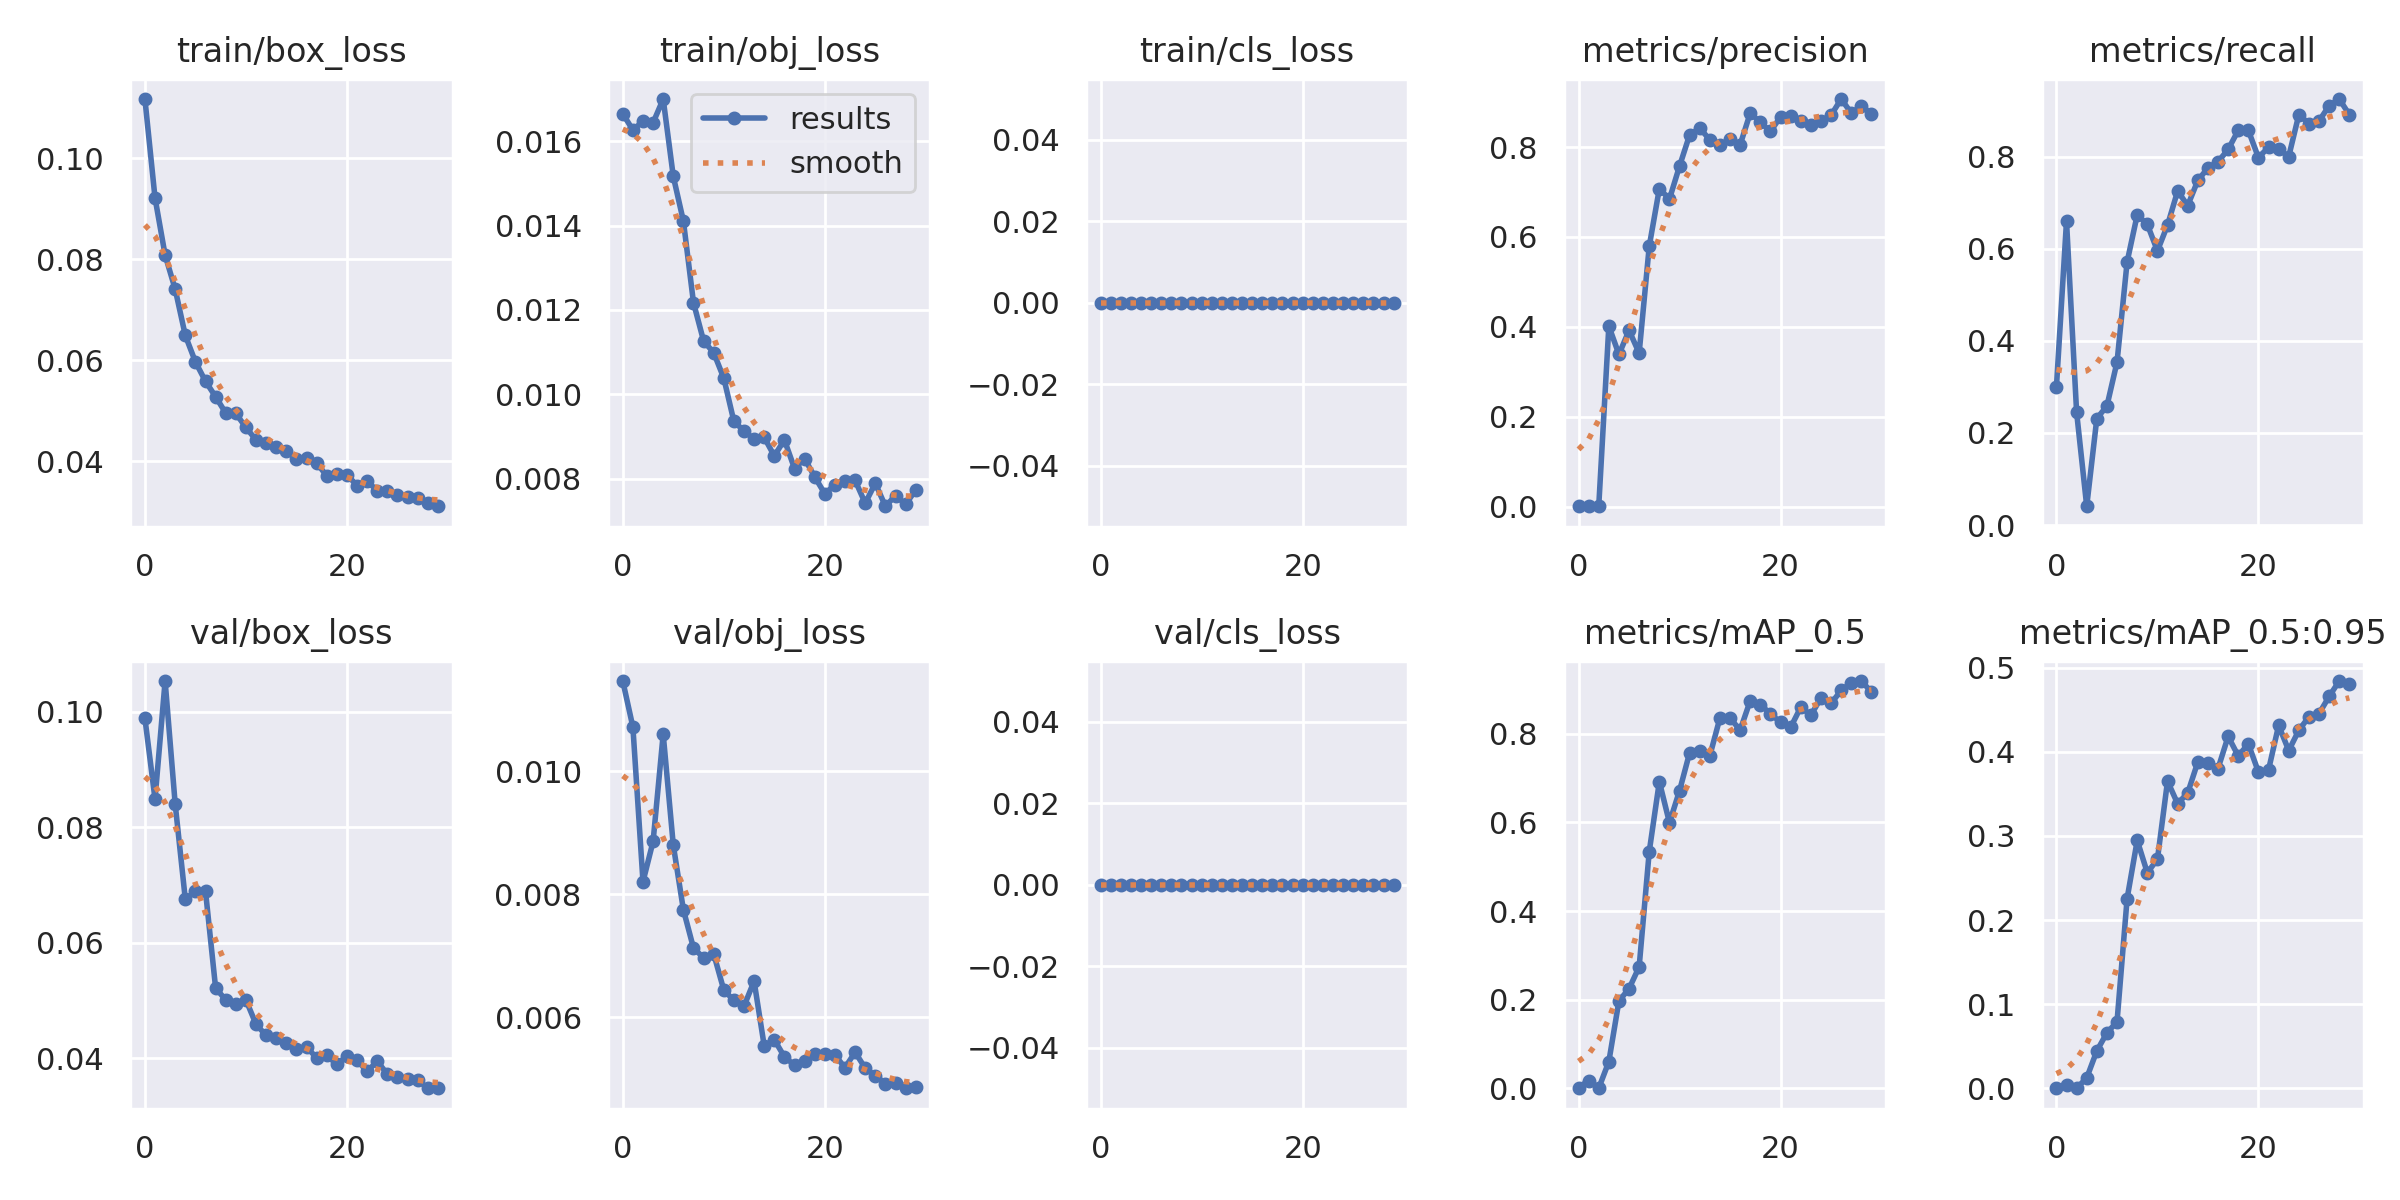

In [54]:
# evaluating the model
import utils
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results4/results.png')

augmented trainig data


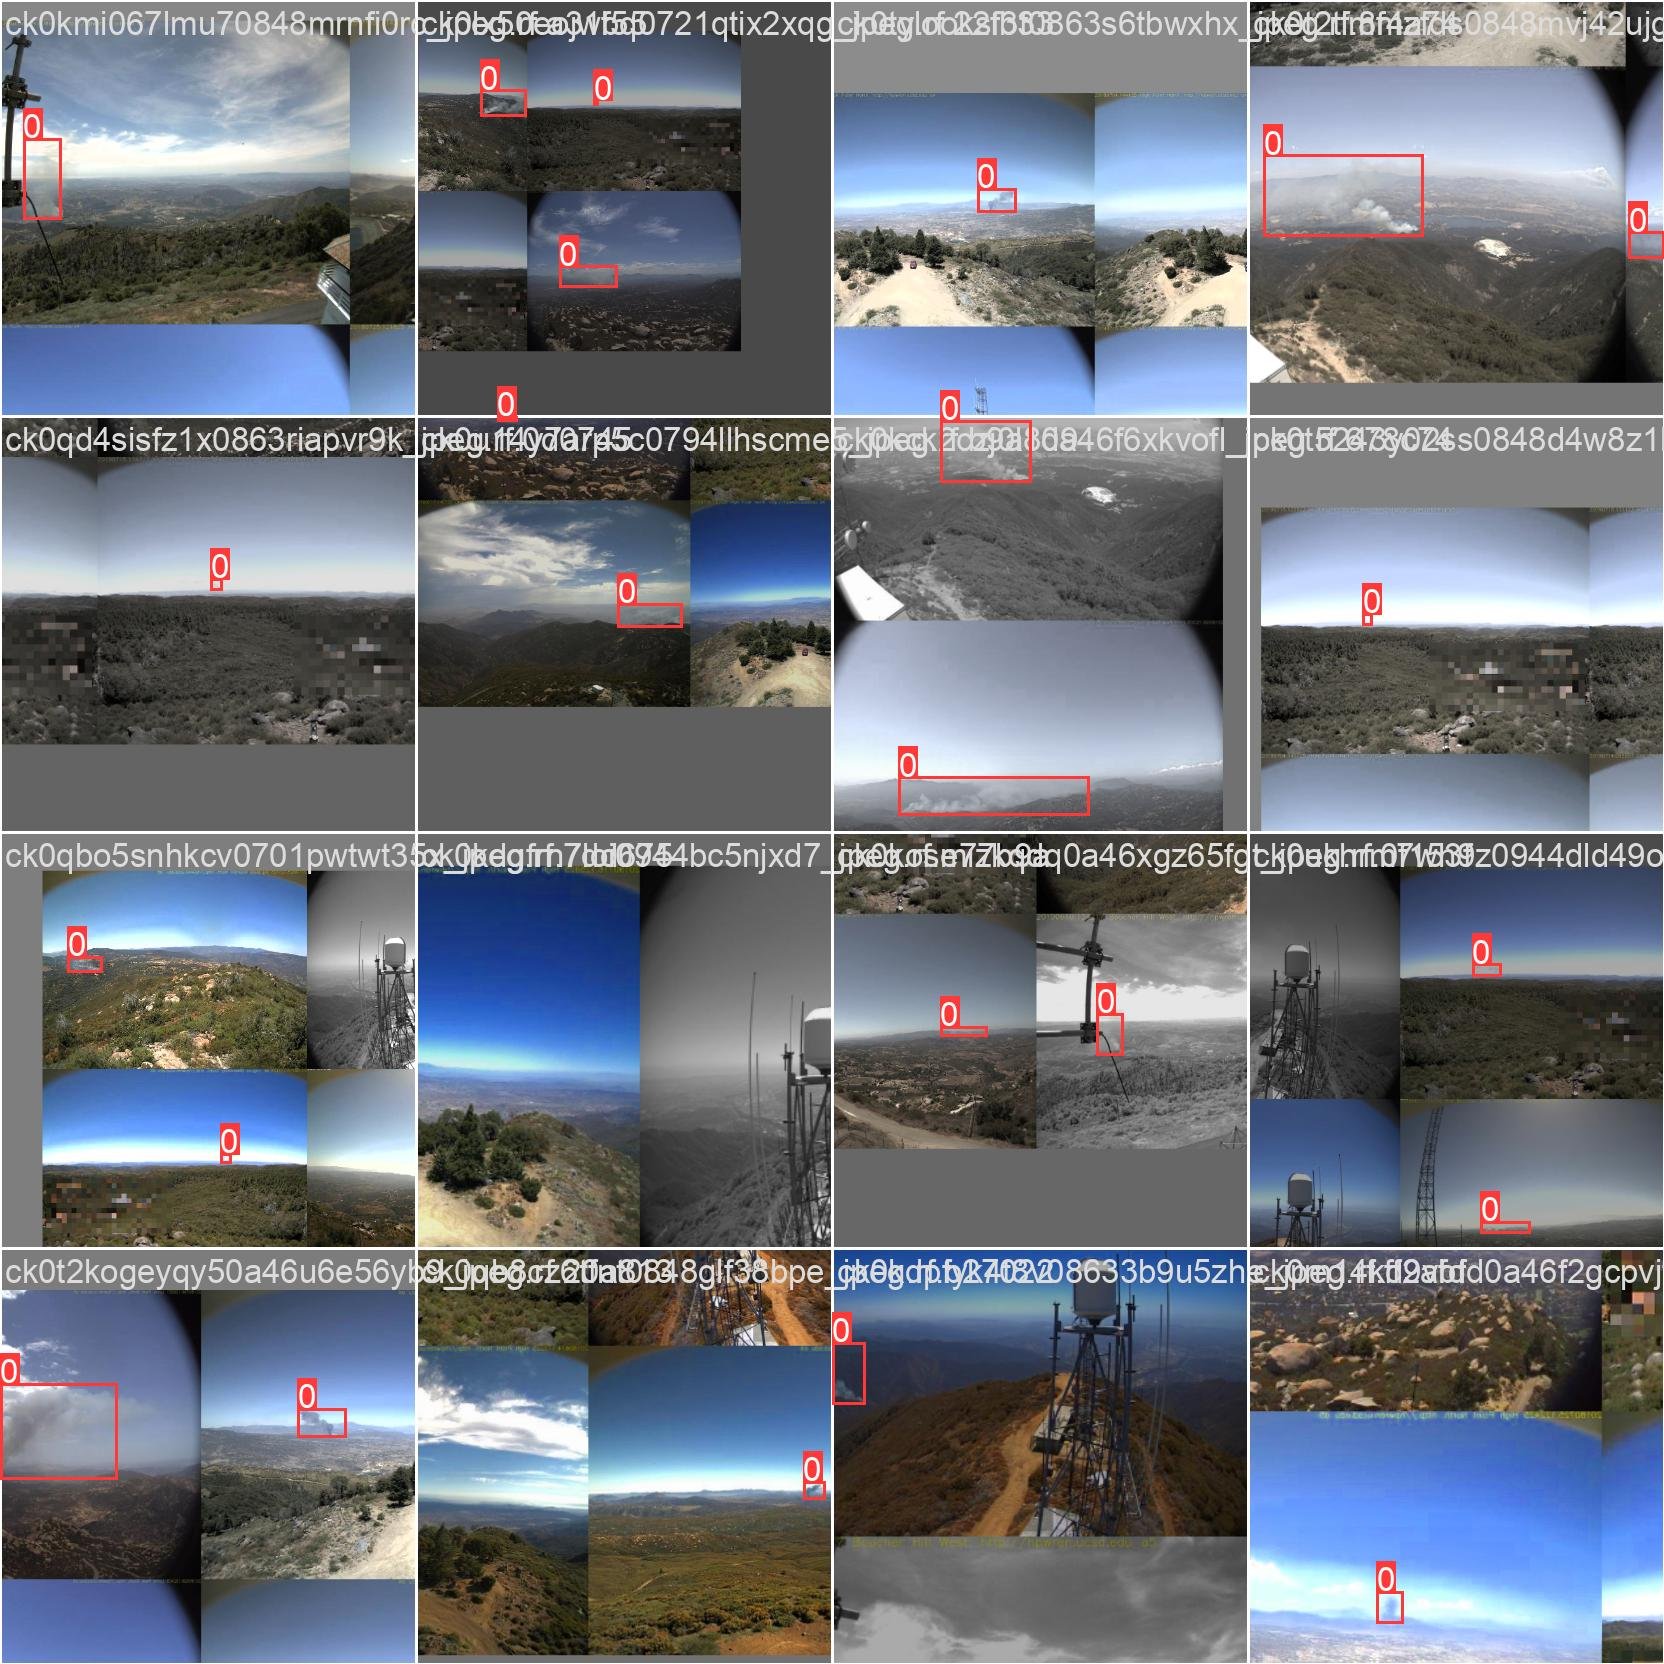

In [56]:
#printing images
print("augmented trainig data")
Image(filename = '/content/yolov5/runs/train/yolov5s_results4/train_batch0.jpg', width=1000)

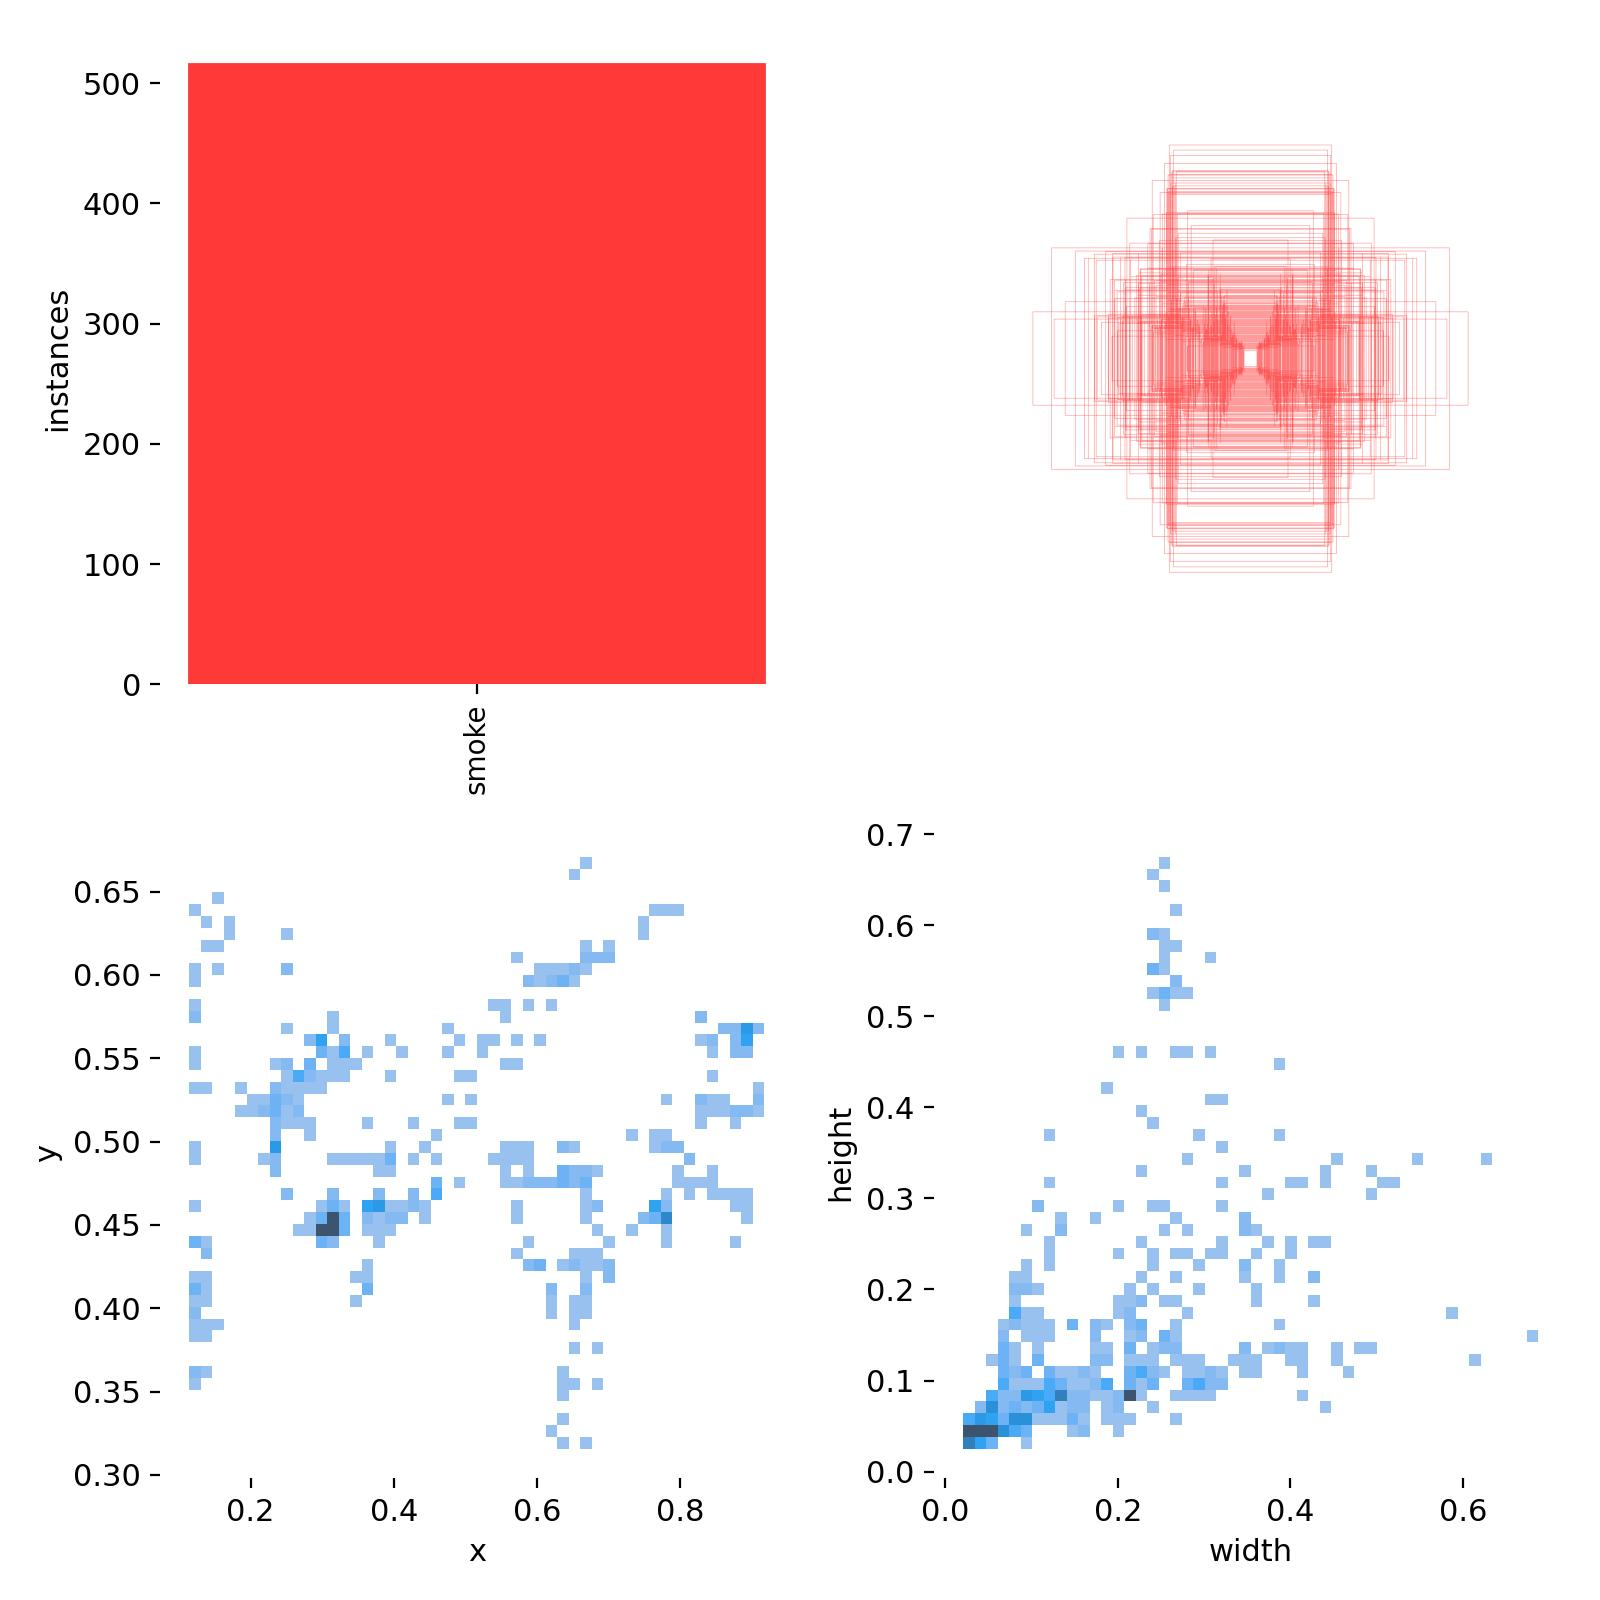

In [58]:
import utils
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results4/labels.jpg')

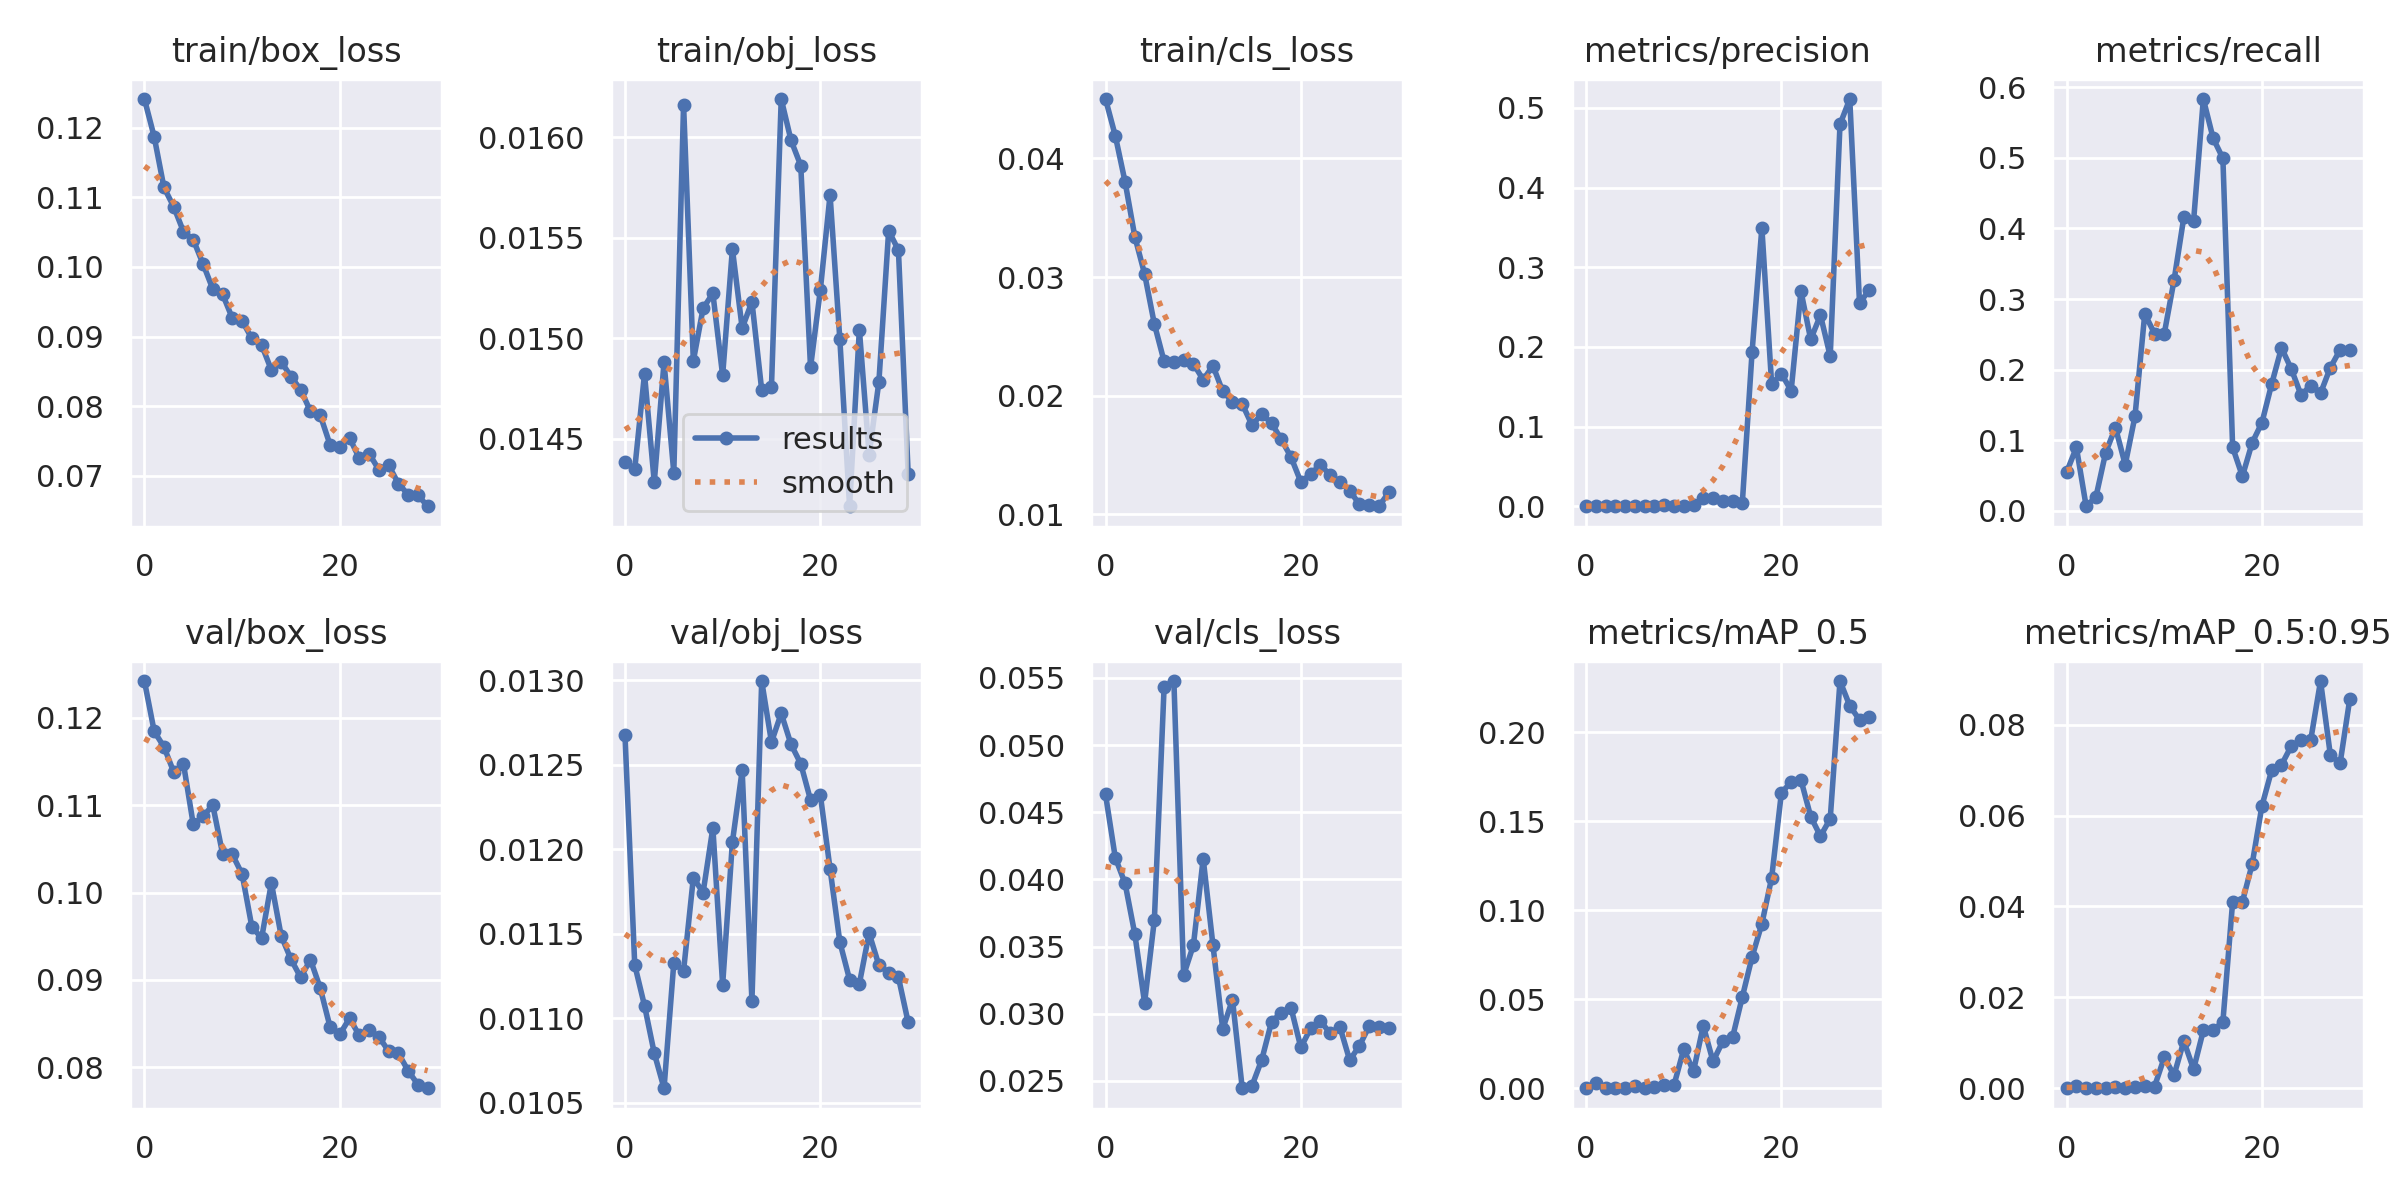

In [28]:
from IPython.display import Image, display
display(Image(filename='runs/train/yolov5s_results2/results.png'))


In [30]:
%pwd

'/content/yolov5'

In [31]:
!python detect.py --weights runs/train/yolov5s_results2/weights/best.pt --img 416 --conf 0.1 --source /content/drive/MyDrive/computervision/sample.jpg --save-txt --save-conf


detect: weights=['runs/train/yolov5s_results2/weights/best.pt'], source=/content/drive/MyDrive/computervision/sample.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/computervision/sample.jpg: 416x192 (no detections), 27.7ms
Speed: 0.5ms pre-process, 27.7ms inference, 24.9ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp2
0 labels saved to runs/detect/exp2/labels
